# Laboratory Session 1: Machine Learning Landscape

## Introducción

Para la presente sesión (Machine Learning Landscape) el alumno explorará el uso del entorno Jupyter para el análisis de datos y programación enfocada a la ciencia de datos. 

En esta sesión aprenderá los conceptos básicos de los módulos `Numpy`, `Pandas`, `Matplotlib` y `Sklearn` a través del desarrollo de **un modelo lineal para determinar el nivel de satisfacción de vida a partir del parámetro GDP**. En consecuencia, el modelo desarrollado utiliza como datos de entrenamiento información recolectada por la OECD y GDP. Los parámetros obtenidos después del entrenamiento son usados para evaluar por inspección visual el comportamiento de los datos contra los datos reales. Por lo tanto, para la presente sección se pueden identificar los siguientes objetivos.

Objetivo General: *Desarrollar un modelo basado en la regresión lineal usando las funciones `fit` del módulo Sklearn para determinar el nivel de satisfacción de vida en función de GDP de cada país.*

Objetivos Específicos:

- Aprender el manejo básico de la plataforma Jupyter y los comandos de inserción, copia, borrado y evaluación de celdas
- Conocer el procedimiento de lectura de archivos CSV
- Relacionarse con el procedimiento de acceso a datos por nombres de columnas, manipulación, edición y filtrado de datos con la estructura de Pandas
- Crear una función en Python para leer las bases de datos de la OECD y GDP, y posteriormente crear un conjunto de datos que exclusivamente incluyan "Life Satisfaction" y  "GDP per capita"
- Entrenar un modelo basado en la regresión lineal 
- Comparar el modelo con los datos reales y determinar nuevos valores de instancias

# The Data: Life Satisfaction and GDP per capita
The next sections will explorer the two datasets: 1) Organisation for Economic Co-operation and Development and 2)International Monetary Fund.

## Life satisfaction data description

This dataset was obtained from the OECD's website at: http://stats.oecd.org/index.aspx?DataSetCode=BLI

```
Int64Index: 3292 entries, 0 to 3291
Data columns (total 17 columns):
﻿"LOCATION"              3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 462.9+ KB
```


### Example using Python Pandas

```
>>> life_sat = pd.read_csv("oecd_bli_2015.csv", thousands=',')

>>> life_sat_total = life_sat[life_sat["INEQUALITY"]=="TOT"]

>>> life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")

>>> life_sat_total.info()
<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Australia to United States
Data columns (total 24 columns):
Air pollution                                37 non-null float64
Assault rate                                 37 non-null float64
Consultation on rule-making                  37 non-null float64
Dwellings without basic facilities           37 non-null float64
Educational attainment                       37 non-null float64
Employees working very long hours            37 non-null float64
Employment rate                              37 non-null float64
Homicide rate                                37 non-null float64
Household net adjusted disposable income     37 non-null float64
Household net financial wealth               37 non-null float64
Housing expenditure                          37 non-null float64
Job security                                 37 non-null float64
Life expectancy                              37 non-null float64
Life satisfaction                            37 non-null float64
Long-term unemployment rate                  37 non-null float64
Personal earnings                            37 non-null float64
Quality of support network                   37 non-null float64
Rooms per person                             37 non-null float64
Self-reported health                         37 non-null float64
Student skills                               37 non-null float64
Time devoted to leisure and personal care    37 non-null float64
Voter turnout                                37 non-null float64
Water quality                                37 non-null float64
Years in education                           37 non-null float64
dtypes: float64(24)
memory usage: 7.2+ KB
```

In [1]:
# Load the data
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/machine-learning-course-uac/1-ml-landscape/main/oecd_bli_2015.csv"
oecd_bli = pd.read_csv(url, thousands=',')
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [2]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [3]:
life_sat_total = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
life_sat_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 3217
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               888 non-null    object 
 1   Country                888 non-null    object 
 2   INDICATOR              888 non-null    object 
 3   Indicator              888 non-null    object 
 4   MEASURE                888 non-null    object 
 5   Measure                888 non-null    object 
 6   INEQUALITY             888 non-null    object 
 7   Inequality             888 non-null    object 
 8   Unit Code              888 non-null    object 
 9   Unit                   888 non-null    object 
 10  PowerCode Code         888 non-null    int64  
 11  PowerCode              888 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  888 non-null    float64
 15  Flag 

In [4]:
new = life_sat_total[life_sat_total["Country"]=='Austria']
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 3182
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               24 non-null     object 
 1   Country                24 non-null     object 
 2   INDICATOR              24 non-null     object 
 3   Indicator              24 non-null     object 
 4   MEASURE                24 non-null     object 
 5   Measure                24 non-null     object 
 6   INEQUALITY             24 non-null     object 
 7   Inequality             24 non-null     object 
 8   Unit Code              24 non-null     object 
 9   Unit                   24 non-null     object 
 10  PowerCode Code         24 non-null     int64  
 11  PowerCode              24 non-null     object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  24 non-null     float64
 15  Flag C

In [5]:
life_sat_pivoted = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")
life_sat_pivoted

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


## GDP per capita

*Gross domestic product* (GDP) per capita is an economic metric that breaks down a country's economic output per person. Economists use GDP per capita to determine how prosperous countries are based on their economic growth.

GDP per capita is calculated by dividing the GDP of a nation by its population. Countries with the higher GDP per capita tend to be those that are industrial, developed countries.

Thus, **GDP per capita measures the economic output of a nation per person.**

---

The Dataset obtained from the IMF's website at: http://goo.gl/j1MSKe

### Data description
```
Int64Index: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 11.9+ KB
```

### Example using Python Pandas

```
>>> gdp_per_capita = pd.read_csv(
...     datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
...     encoding='latin1', na_values="n/a", index_col="Country")
...
>>> gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
```

In [6]:
url2 = "https://raw.githubusercontent.com/machine-learning-course-uac/1-ml-landscape/main/gdp_per_capita.csv"
gdp_per_capita = pd.read_csv(url2,thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [7]:
gdp_per_capita.rename(columns={"2015": "GDP"}, inplace=True)
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [8]:
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


# Making all the process in a function 

In [9]:
def CountryStats(oecd, gdp):
    # YOUR CODE HERE
    return country_stats[["GDP", 'Life satisfaction']].iloc[keep_indices]

In [10]:
import mluac as ml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
url2 = "https://raw.githubusercontent.com/machine-learning-course-uac/1-ml-landscape/main/gdp_per_capita.csv"
gdp_per_capita = pd.read_csv(url2,thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")
url = "https://raw.githubusercontent.com/machine-learning-course-uac/1-ml-landscape/main/oecd_bli_2015.csv"
oecd_bli = pd.read_csv(url, thousands=',')
cs = ml.prepare_country_stats(oecd_bli, gdp_per_capita)
cs

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


## Exploring the data

In [13]:
X = np.c_[cs["GDP per capita"]]
y = np.c_[cs["Life satisfaction"]]

In [14]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [15]:
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

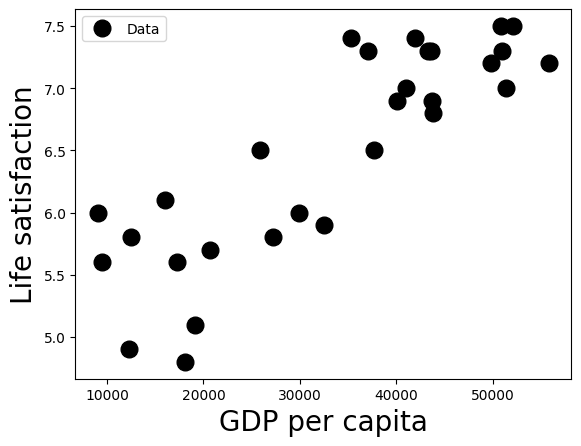

In [16]:
plt.plot(X,y, 'ok', markersize=12, label="Data")
plt.xlabel("GDP per capita", fontsize=20)
plt.ylabel("Life satisfaction", fontsize=20)
plt.legend()
plt.show()

# Model of GDP and Life Satisfaction
## Fitting and predictions

In [17]:
from sklearn.linear_model import LinearRegression
# Select a linear model
model = LinearRegression()

In [18]:
# Train the model
model.fit(X, y)

LinearRegression()

In [19]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Extracting data from model

The Linear regression model

$$f(\theta)=x_0 +x_1 \theta_1 +x_2 \theta_2 + \cdots$$

In [20]:
#theta_0
t0 = model.intercept_[0]
t0

4.853052800266435

In [21]:
#theta_1
t1 =model.coef_
t1

array([[4.91154459e-05]])

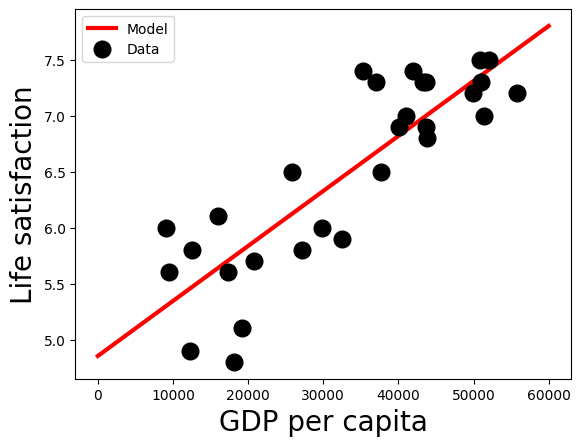

In [22]:
Xnew=np.c_[np.linspace(0, 60000, 1000)]
plt.plot(Xnew, t0 + t1*Xnew, "r", linewidth=3,label="Model")
plt.plot(X,y, 'ok', markersize=12, label="Data")
plt.xlabel("GDP per capita", fontsize=20)
plt.ylabel("Life satisfaction", fontsize=20)
plt.legend()
plt.show()